### **State University of Campinas - UNICAMP** </br>
**Course**: MC886A </br>
**Professor**: Marcelo da Silva Reis </br>
**TA (PED)**: Marcos Vinicius Souza Freire

---

### **Hands-On: Introduction to Machine Learning and Tensors in PyTorch**
##### Notebook: 02 Neural Nets - Basics

##### Training & Testing Neural Networks in PyTorch


> Based on [https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)

---

### **Table of Contents**

1. [**Overview**](#overview) </br>
2. [**Step 1: Data Preparation with `torch.utils.data`**](#step-1-data-preparation-with-torchutilsdata) </br>
3. [**Step 2: Working with Tensors**](#step-2-working-with-tensors) </br>
4. [**Step 3: Building Neural Networks with `torch.nn.Module`**](#step-3-building-neural-networks-with-torchnnmodule)

---

#### **Overview**

Now we'll explore how to build, train, and test neural networks using **PyTorch**. The process involves:
- **Training**: Optimize the model using labeled data.
- **Validation**: Tune hyperparameters and monitor overfitting.
- **Testing**: Evaluate the final model on unseen data.

Flow:

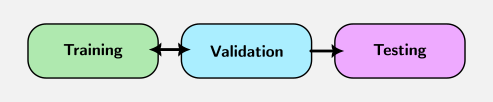


Source: Author

---

#### **Step 1: Data Preparation with `torch.utils.data`**

##### Key Concepts
- **`Dataset`**: Stores data samples and their labels (e.g., images and classes).
- **`DataLoader`**: Batches data, shuffles it (if needed), and supports multiprocessing for efficiency.

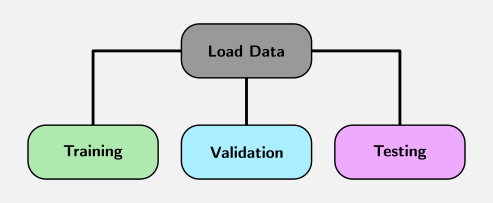

Source: Author

##### Code Example

```python

from torch.utils.data import Dataset, DataLoader

# Custom Dataset class
class MyDataset(Dataset):
    def __init__(self, file):
        # Load and preprocess data (e.g., from a file)
        self.data = ...
    
    def __getitem__(self, index):
        # Return a single sample (e.g., input tensor, label)
        return self.data[index]
    
    def __len__(self):
        # Return total number of samples (size of the dataset)
        return len(self.data)

# Instantiate Dataset and DataLoader
file = "data.csv"  # Example file
dataset = MyDataset(file)
dataloader = DataLoader(dataset, batch_size=5, shuffle=True)  # Batch size = 5, shuffle for training
```

##### Notes
- **Training**: Use `shuffle=True` to randomize data and reduce overfitting.
- **Testing**: Use `shuffle=False` for consistent evaluation.
- **Mini-batches**: `DataLoader` groups data into batches (e.g., 5 samples per batch).

---

##### **Step 2: Working with Tensors**

##### Creating Tensors
Tensors are PyTorch's core data structure, similar to NumPy arrays but with GPU support.

##### From Data
```python
import torch
import numpy as np

x = torch.tensor([[1, -1], [-1, 1]])  # From a list
x = torch.from_numpy(np.array([[1, -1], [-1, 1]]))  # From NumPy
```

##### Constant Tensors
```python
x = torch.zeros([2, 2])  # 2x2 tensor of zeros
x = torch.ones([1, 2, 5])  # 1x2x5 tensor of ones
```

##### **Common Operations**
```python
# Arithmetic
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[5, 6], [7, 8]])
z = x + y  # Addition
z = x - y  # Subtraction
y = x.pow(2)  # Element-wise power
y = x.sum()  # Sum all elements
y = x.mean()  # Mean of all elements

# Transpose
x = torch.zeros([2, 3])  # Shape: [2, 3]
x = x.transpose(0, 1)  # Swap dims 0 and 1 -> Shape: [3, 2]

# Squeeze/Unsqueeze
x = torch.zeros([1, 2, 3])  # Shape: [1, 2, 3]
x = x.squeeze(0)  # Remove dim 0 -> Shape: [2, 3]
x = x.unsqueeze(1)  # Add dim at index 1 -> Shape: [2, 1, 3]

# Concatenation
x = torch.zeros([2, 1, 3])
y = torch.zeros([2, 3, 3])
z = torch.zeros([2, 2, 3])
w = torch.cat([x, y, z], dim=1)  # Concat along dim 1 -> Shape: [2, 6, 3]
```

##### **Data Types**
Ensure model and data types match to avoid errors:
- `torch.float` (32-bit float): `torch.FloatTensor`
- `torch.long` (64-bit integer): `torch.LongTensor`

##### **Device Management**
Move tensors to CPU or GPU:
```python
x = torch.zeros([2, 2])
x = x.to('cpu')  # CPU
x = x.to('cuda')  # GPU (if available)

# Check GPU availability
print(torch.cuda.is_available())  # True if GPU is present
```

##### **Why GPUs?**
GPUs excel at parallel computation, speeding up matrix operations in neural networks.

##### **Gradient Calculation**
PyTorch can compute gradients automatically (autograd).

**1)** Tensor with gradient tracking

```python
x = torch.tensor([[1., 0.], [-1., 1.]], requires_grad=True)
```

**2)** $z = x_11^2 + x_12^2 + x_21^2 + x_22^2 = 1 + 0 + 1 + 1 = 3$

```python
z = x.pow(2).sum()
```

**3)** Compute $dz/dx = [∂z/∂x_11, ∂z/∂x_12, ∂z/∂x_21, ∂z/∂x_22]$

```python
z.backward()
```

**4)** Gradient: $[[2, 0], [-2, 2]] (∂z/∂x_ij = 2 * x_ij)$

```python
print(x.grad)
```


##### **Mathematical Breakdown**
1. `x = [[1, 0], [-1, 1]]`, `requires_grad=True` enables gradient tracking.
2. `z = x.pow(2).sum()`: $ z = 1^2 + 0^2 + (-1)^2 + 1^2 = 3 $.
3. `z.backward()`: Computes $ \frac{\partial z}{\partial x_{ij}} = 2 \cdot x_{ij} $.
4. `x.grad`: $ [[2 \cdot 1, 2 \cdot 0], [2 \cdot (-1), 2 \cdot 1]] = [[2, 0], [-2, 2]] $.

---

##### **Step 3: Building Neural Networks with `torch.nn.Module`**

##### Network Layers
- **Linear Layer (Fully-Connected)**: $ y = Wx + b $, where $ W $ is the weight matrix, $ x $ is input, and $ b $ is bias.
  ```python
  import torch.nn as nn
  layer = nn.Linear(in_features=10, out_features=5)  # 10 inputs -> 5 outputs
  ```
  - **Fully-Connected**: Every input connects to every output.


##### Non-Linear Activation Functions
Add non-linearity to capture complex patterns:
- `nn.ReLU()`: $ f(x) = \max(0, x) $
- `nn.Sigmoid()`: $ f(x) = \frac{1}{1 + e^{-x}} $
```python
relu = nn.ReLU()
x = torch.tensor([-1., 0., 1.])
print(relu(x))  # tensor([0., 0., 1.])
```

##### Now, let's create our first model

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# Synthetic Dataset
class MyDataset(Dataset):
    def __init__(self, num_samples=100):
        self.data = torch.randn(num_samples, 10)
        self.labels = torch.sum(self.data, dim=1, keepdim=True)

    def __getitem__(self, index):
        return self.data[index], self.labels[index]

    def __len__(self):
        return len(self.data)

# Neural Network
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(10, 5)  # 10 input features -> 5 hidden
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(5, 1)   # 5 hidden -> 1 output (regression)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Setup
device = 'cuda' if torch.cuda.is_available() else 'cpu'
dataset = MyDataset(num_samples=100)
tr_set = DataLoader(dataset, batch_size=16, shuffle=True)
model = MyModel().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Training Loop
n_epochs = 10
for epoch in range(n_epochs):
    model.train()
    for x, y in tr_set:
        optimizer.zero_grad()
        x, y = x.to(device), y.to(device)
        pred = model(x)
        loss = criterion(pred, y)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

##### Now, let's train the well-known MNIST dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, Subset
import pandas as pd
import numpy as np  # Added for np.flipud
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# File paths
train_data = "/content/drive/MyDrive/TA-PED/CLASSROOM/hands-on_00/data/train.csv"
test_data = "/content/drive/MyDrive/TA-PED/CLASSROOM/hands-on_00/data/test.csv"
submission_file = "/content/drive/MyDrive/TA-PED/CLASSROOM/hands-on_00/data/sample_submission.csv"

# Dataset class
class MyDataset(Dataset):
    def __init__(self, csv_file, has_labels=True):
        df = pd.read_csv(csv_file)
        if has_labels:
            self.labels = torch.tensor(df['label'].values, dtype=torch.long)
            self.data = torch.tensor(df.drop('label', axis=1).values, dtype=torch.float32) / 255.0
        else:
            self.data = torch.tensor(df.values, dtype=torch.float32) / 255.0
            self.labels = None

    def __getitem__(self, index):
        if self.labels is not None:
            return self.data[index], self.labels[index]
        return self.data[index]

    def __len__(self):
        return len(self.data)

# Model
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Setup
device = 'cuda' if torch.cuda.is_available() else 'cpu'
full_dataset = MyDataset(train_data, has_labels=True)

# Split train.csv into training and validation
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(full_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

test_dataset = MyDataset(test_data, has_labels=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Model, Loss, Optimizer
model = MyModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Training Loop with Loss Tracking
n_epochs = 10
train_losses = []
val_losses = []
for epoch in range(n_epochs):
    # Training
    model.train()
    epoch_loss = 0
    for x, y in train_loader:
        optimizer.zero_grad()
        x, y = x.to(device), y.to(device)
        pred = model(x)
        loss = criterion(pred, y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * len(x)
    avg_epoch_loss = epoch_loss / len(train_dataset)
    train_losses.append(avg_epoch_loss)
    print(f"Epoch {epoch+1}, Train Loss: {avg_epoch_loss:.4f}")

    # Validation
    model.eval()
    total_loss = 0
    correct = 0
    with torch.no_grad():
        for x, y in val_loader:
            x, y = x.to(device), y.to(device)
            pred = model(x)
            loss = criterion(pred, y)
            total_loss += loss.item() * len(x)
            correct += (pred.argmax(dim=1) == y).sum().item()
    val_loss = total_loss / len(val_dataset)
    val_losses.append(val_loss)
    val_accuracy = correct / len(val_dataset)
    print(f"Epoch {epoch+1}, Val Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.4f}")

# Test Loop (Inference)
model.eval()
test_preds = []
test_images = []
with torch.no_grad():
    for x in test_loader:
        x = x.to(device)
        pred = model(x)
        test_preds.append(pred.argmax(dim=1).cpu())
        test_images.append(x.cpu())
test_preds = torch.cat(test_preds)
test_images = torch.cat(test_images)

# --- Plotting ---

# 1. Training and Validation Loss Plot
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=list(range(1, n_epochs + 1)), y=train_losses, mode='lines+markers', name='Training Loss'))
fig1.add_trace(go.Scatter(x=list(range(1, n_epochs + 1)), y=val_losses, mode='lines+markers', name='Validation Loss'))
fig1.update_layout(
    title="Training and Validation Loss Over Epochs",
    xaxis_title="Epoch",
    yaxis_title="Loss",
    width=600, height=400,
    template="plotly_white",
    legend=dict(x=0.8, y=1.0)
)
fig1.show()

# 2. Validation Metrics Bar Plot
fig2 = go.Figure()
fig2.add_trace(go.Bar(x=["Loss", "Accuracy"], y=[val_losses[-1], val_accuracy], text=[f"{val_losses[-1]:.4f}", f"{val_accuracy:.4f}"], textposition='auto'))
fig2.update_layout(
    title="Final Validation Metrics",
    yaxis_title="Value",
    width=600, height=400,
    template="plotly_white"
)
fig2.show()

# 3. Test Predictions with Images (10 samples)
fig3 = make_subplots(rows=2, cols=5, subplot_titles=[f"Pred: {pred}" for pred in test_preds[:10]])
for i in range(10):
    img = test_images[i].reshape(28, 28).numpy()
    img = np.flipud(img)  # Flip vertically to correct orientation
    row = (i // 5) + 1
    col = (i % 5) + 1
    fig3.add_trace(go.Heatmap(z=img, colorscale='gray', showscale=False), row=row, col=col)

# Update layout for square aspect ratio
fig3.update_layout(
    title="Sample Test Predictions (10 Images)",
    width=1000,
    height=500,
    template="plotly_white",
    autosize=False
)
for i in range(1, 11):
    row = (i - 1) // 5 + 1
    col = (i - 1) % 5 + 1
    fig3.update_xaxes(scaleanchor=f"y{i}", scaleratio=1, row=row, col=col)
    fig3.update_yaxes(scaleanchor=f"x{i}", scaleratio=1, row=row, col=col)
fig3.show()

# Save test predictions
pd.DataFrame({'ImageId': range(1, len(test_preds) + 1), 'Label': test_preds}).to_csv(submission_file, index=False)

🚀🚀🚀